In [25]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image                 #PIL -> Python Import Library PIL(in caps always)
import pandas as pd
import numpy as np
import re                             # re stands for Regular Expression
import io
# import mysql.connector as sql
# import sqlalchemy
# from sqlalchemy import create_engine
import sqlite3


In [10]:
def i_t_i(path):
    input_image=Image.open(path)

    #image to array format
    image_arr=np.array(input_image)

    reader=easyocr.Reader(['en'])        #used to read in language 
    text=reader.readtext(image_arr, detail=0) #by giving 0 means it will remove all the values and provide on the text

    return text, input_image



In [7]:
i_t_i("K:/BizCardX/2.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


(['Amit kumar',
  'CEO & FOUNDER',
  '123-456-7569',
  'hello@global.com',
  'WWW',
  'global.com',
  '123 global',
  'Erode,',
  'GLOBAL',
  'TamilNadu 600115',
  'INSURANCE',
  'St ,'],
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590>)

In [13]:
text_image, input_image= i_t_i("K:/BizCardX/2.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [14]:
text_image

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

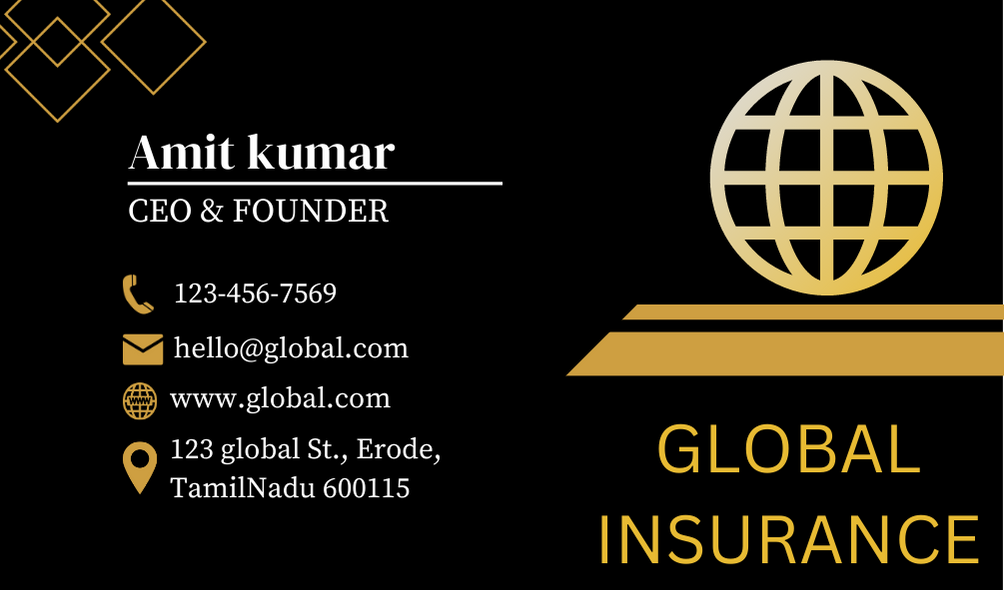

In [15]:
input_image

In [17]:
# creating dictionary to read the data 
def extract_text(texts):
    extract_dict={"Name":[], "Designation":[], "Company Name":[], "Contact":[], "Email":[],"Web Site":[],
                  "Address":[], "Pincode":[]}
    
    extract_dict["Name"].append(texts[0])          #should not give = while appending the data in variable
    extract_dict["Designation"].append(texts[1])

    for i in range(2,len(texts)):
        if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and '-' in texts[i]):                                        # +is used tyo choose the contact no. -
            extract_dict["Contact"].append(text_image[i])

        elif "@" in texts[i] and ".com"in texts[i]:
            extract_dict["Email"].append(texts[i])

        elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i] :
            small=texts[i].lower()
            extract_dict["Web Site"].append(small)

        elif "TamilNadu" in texts[i] or  "Tami lNadu" in texts[i] or texts[i].isdigit():
            extract_dict["Pincode"].append(texts[i])

        elif re.match(r'^[A-Za-z]',texts[i]):
            extract_dict["Company Name"].append(texts[i])

        else:
            remove_colon=re.sub(r'[,;]','',texts[i])
           # extract_dict["Address"].append(texts[i])    
            extract_dict["Address"].append(remove_colon)   

    for key,value in extract_dict.items():
        #print(key,":",value, len(value))
        if len(value)>0:
            concadenate=" ".join(value)  
            extract_dict[key] = [concadenate]  
            #print(concadenate)    

        else:
            value="NA"
            extract_dict[key] = [value]

    #print (extract_dict)
    return extract_dict        

In [17]:
extract_text(text_image)

{'Name': ['Amit kumar'], 'Designation': ['CEO & FOUNDER'], 'Company Name': [], 'Contact': ['123-456-7569'], 'Email': [], 'Web Site': [], 'Address': [], 'Pincode': []}


In [30]:
extract_text(text_image)    #with colon and comma


{'Name': ['Selva'], 'Designation': ['DATA MANAGER'], 'Company Name': ['selva', 'digitals'], 'Contact': ['+123-456-7890', '+123-456-7891'], 'Email': ['hello@XYZ1.com'], 'Web Site': ['www xyzi.com'], 'Address': ['123 ABC St , Chennai;'], 'Pincode': ['TamilNadu 600113']}


In [33]:
extract_text(text_image)     #without colon and comma

{'Name': ['Selva'], 'Designation': ['DATA MANAGER'], 'Company Name': ['selva', 'digitals'], 'Contact': ['+123-456-7890', '+123-456-7891'], 'Email': ['hello@XYZ1.com'], 'Web Site': ['www xyzi.com'], 'Address': ['123 ABC St  Chennai'], 'Pincode': ['TamilNadu 600113']}


In [25]:
text_image, input_image= i_t_i("K:/BizCardX/1.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [27]:
extract_text(text_image)

{'Name': ['Selva'], 'Designation': ['DATA MANAGER'], 'Company Name': ['selva', 'digitals'], 'Contact': ['+123-456-7890', '+123-456-7891'], 'Email': ['hello@XYZ1.com'], 'Web Site': ['www xyzi.com'], 'Address': [], 'Pincode': ['TamilNadu 600113']}


In [28]:
text_image

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [32]:
extract_text(text_image)      #without concadenation and key 


{'Name': ['Amit kumar'],
 'Designation': ['CEO & FOUNDER'],
 'Company Name': ['global.com Erode, GLOBAL INSURANCE St ,'],
 'Contact': ['123-456-7569'],
 'Email': ['hello@global.com'],
 'Web Site': ['www'],
 'Address': ['123 global'],
 'Pincode': ['TamilNadu 600115']}

In [39]:
extract_text(text_image)    #with concadenation 

Selva
DATA MANAGER
selva digitals
+123-456-7890 +123-456-7891
hello@XYZ1.com
www xyzi.com
123 ABC St  Chennai
TamilNadu 600113
{'Name': ['Selva'], 'Designation': ['DATA MANAGER'], 'Company Name': ['selva', 'digitals'], 'Contact': ['+123-456-7890', '+123-456-7891'], 'Email': ['hello@XYZ1.com'], 'Web Site': ['www xyzi.com'], 'Address': ['123 ABC St  Chennai'], 'Pincode': ['TamilNadu 600113']}


In [21]:
text_data=extract_text(text_image)
tdf=pd.DataFrame(text_data)
tdf

,Name,Designation,Company Name,Contact,Email,Web Site,Address,Pincode
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115


In [46]:
# converting image to bytes

img_bytes=io.BytesIO()                           #need to pass the image file
input_image.save(img_bytes, format="PNG")                                #input_image is the name  to call 

#to get data from bytes format 
img_data=img_bytes.getvalue()
# img_data

#Dictonary
data={"Image":[img_data]}
# data

bdf=pd.DataFrame(data)
#bdf1

con_df=pd.concat([tdf,bdf],axis=1)
con_df

,Name,Designation,Company Name,Contact,Email,Web Site,Address,Pincode,Image
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [37]:
# while using sqlite3 all the keywords should be in caps

mydb=sqlite3.connect("bizcardx_db")
cursor=mydb.cursor()


#table Creation

table_query= '''CREATE TABLE IF NOT EXISTS bizcard_details (
                    name VARCHAR(255),
                    Designation VARCHAR(255),
                    Company_Name VARCHAR(255),
                    Contact VARCHAR(255),
                    Email VARCHAR(255),
                    Web_Site TEXT,
                    Address TEXT,
                    Pincode VARCHAR(255),
                    image TEXT )'''

cursor.execute(table_query)

mydb.commit()


In [48]:
#inster data

insert_query='''INSERT INTO bizcard_details(name, Designation, Company_Name, Contact, Email, Web_Site, Address, Pincode,image)
                                            values(?,?,?,?,?,?,?,?,?)'''

datas = con_df.values.tolist()[0]    
cursor.execute(insert_query, datas)  # Execute the insert query with the data
mydb.commit()                                    

In [53]:
#select data

select_query = "SELECT * FROM bizcard_details"

cursor.execute(select_query)
table=cursor.fetchall()
mydb.commit()


table_df=pd.DataFrame(table, columns=("name", "Designation", "Company_Name", "Contact", "Email", "Web_Site", "Address", "Pincode","image"))
                                            

In [40]:
Datas= con_df.values.tolist()   
Datas

[['Amit kumar',
  'CEO & FOUNDER',
  'global.com Erode, GLOBAL INSURANCE St ,',
  '123-456-7569',
  'hello@global.com',
  'www',
  '123 global',
  'TamilNadu 600115',
  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\x9du`\x14\xd7\xda\xc6\x7f3\xb3\xbbqW H\x0c)\x94\x1a\xd2\x16\xea\xd4K\rm\xa9\xcb\xedmo\xa9\xcbW\xef\xed\xad{{\xeb\xbd5\xea\xee\xeeT(\xa5\x06-\x96\x04\xd7\x18I\x88\xac\xce\xcc\xf7\xc7\xec\xacD \t\x81\x04\xfa\xfe\xeeM\x97\xdd\x1dy\xcf\x99\t\xccs\x9e\xf7\xbcG\x01L\xb6\x90CGe\xf1\xaf\t\x85\xf4\xcf\x8d\xa7|\x83\x9b\x07^[\xcag?W\xe0\xd7\xb7\xf8\xd0;\x1c.\xa7\xca\x81\xbbgr\xe5I\xc5\xa4\'\xc7\xb0\xb6\xca\xcd\x13\xef-\xe7\xedo\xd7uwh\xed"1N\xe3\xec\xf1\xfd\x99zp_\\N\x95\xd9\x0b6p\xef\xcbe\x94\xacjD\xa1s7\xd3\xc8\xc1\xa9\\4\xa5\x90\xdd\x06\xa6R\xbe\xc1\xcb\xcb\x9f\xaf\xe2\x7f\xef\xaf\xc0\x90\xdbG\x10\x04A\x10\x04A\x10\x84\xbf!yyy\xac\\\xb9\x12uK\x0e\xa2(0bP\nW\x9e4\x90\xc2>\tT\xd4x\xb8\xef\xd5%|8\xab\\\xc4z

In [49]:
Datas= con_df.values.tolist()[0]   
Datas

['Amit kumar',
 'CEO & FOUNDER',
 'global.com Erode, GLOBAL INSURANCE St ,',
 '123-456-7569',
 'hello@global.com',
 'www',
 '123 global',
 'TamilNadu 600115',
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\x9du`\x14\xd7\xda\xc6\x7f3\xb3\xbbqW H\x0c)\x94\x1a\xd2\x16\xea\xd4K\rm\xa9\xcb\xedmo\xa9\xcbW\xef\xed\xad{{\xeb\xbd5\xea\xee\xeeT(\xa5\x06-\x96\x04\xd7\x18I\x88\xac\xce\xcc\xf7\xc7\xec\xacD \t\x81\x04\xfa\xfe\xeeM\x97\xdd\x1dy\xcf\x99\t\xccs\x9e\xf7\xbcG\x01L\xb6\x90CGe\xf1\xaf\t\x85\xf4\xcf\x8d\xa7|\x83\x9b\x07^[\xcag?W\xe0\xd7\xb7\xf8\xd0;\x1c.\xa7\xca\x81\xbbgr\xe5I\xc5\xa4\'\xc7\xb0\xb6\xca\xcd\x13\xef-\xe7\xedo\xd7uwh\xed"1N\xe3\xec\xf1\xfd\x99zp_\\N\x95\xd9\x0b6p\xef\xcbe\x94\xacjD\xa1s7\xd3\xc8\xc1\xa9\\4\xa5\x90\xdd\x06\xa6R\xbe\xc1\xcb\xcb\x9f\xaf\xe2\x7f\xef\xaf\xc0\x90\xdbG\x10\x04A\x10\x04A\x10\x84\xbf!yyy\xac\\\xb9\x12uK\x0e\xa2(0bP\nW\x9e4\x90\xc2>\tT\xd4x\xb8\xef\xd5%|8\xab\\\xc4z\x1b\xf8\

In [52]:
table_df

,0,1,2,3,4,5,6,7,8
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [54]:
table_df

,name,Designation,Company_Name,Contact,Email,Web_Site,Address,Pincode,image
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
